In [27]:
import numpy as  np
import matplotlib.pyplot as plt
import itertools

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams.update({'font.size': 12})

import warnings; warnings.simplefilter('ignore')

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix 

import mne
from mne.preprocessing import Xdawn
from mne.decoding import Vectorizer
from mne.viz import tight_layout


In [28]:
filename="/Volumes/flashDrive/data/Ex10_Suj12_Run1-epo.fif"
epoch1 = mne.read_epochs(filename)

Reading /Volumes/flashDrive/data/Ex10_Suj12_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
165 matching events found
Created an SSP operator (subspace dimension = 1)
165 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [30]:
len(epoch1[epoch1.events[:,-1] == 4])

40

In [32]:
len(epoch1[epoch1.events[:,-1] == 5])

38

In [33]:
len(epoch1)

165

In [35]:
#extract only events with id 4 or 5 (new or scrambles)
epochs_binary = epoch1[(epoch1.events[:,-1] == 4) | (epoch1.events[:,-1] == 5)]

clf = make_pipeline(Xdawn(n_components = 3),
                    Vectorizer(),
                    MinMaxScaler(),
                    LDA())
#cross validator
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

total_score = []
for i in range(1,21):
    for j in range(1,5):
        if i == 4:
            if j==4:
                continue
        elif i == 11:
            if j == 3:
                continue
        elif i == 12:
            if j == 1:
                continue
        if i == 14:
            if j == 4:
                continue  
        elif i == 15:
            if j == 3:
                continue 
            if j == 4:
                continue
        elif i == 20:
            if j == 2:
                continue    
                
        file = "/Volumes/flashDrive/data/Ex10_Suj" + str(i)+ "_Run" + str(j) + "-epo.fif"
        epoch = mne.read_epochs(file) 
        epoch = epoch.pick_channels(epoch.ch_names[0:60])
        
        #checking if total epochs less than 200
        if len(epoch) < 200:
            continue
        
        else:
            #extract only events with id 4 or 5 (new or scramble)
            epochs_binary = epoch[(epoch.events[:,-1] == 4) | (epoch.events[:,-1] == 5)]
            
            #check the diff of new epochs vs scrambled epoch is not too great
            if abs(len(epoch[epoch.events[:,-1] == 4]) - len(epoch[epoch.events[:,-1] == 5])) > 40:
                continue
            
            else:
                #Do cross-validation
                labels_binary = epochs_binary.events[:,-1]
                preds_binary = np.empty(len(labels_binary))
                for train, test in cv.split(epochs_binary, labels_binary):
                    clf.fit(epochs_binary[train], labels_binary[train])
                    preds_binary[test] = clf.predict(epochs_binary[test])
        
                target_names = ['new', 'scrambled']
                report = classification_report(labels_binary, preds_binary, target_names=target_names)
                score = accuracy_score(labels_binary, preds_binary)  
                print(score)
                total_score.append(score)

Reading /Volumes/flashDrive/data/Ex10_Suj1_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.6170212765957447
Reading /Volumes/flashDrive/data/Ex10_Suj1_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.6875
Reading /Volumes/flashDrive/data/Ex10_Suj1_Run3-ep

    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
256 matching events found
Created an SSP operator (subspace dimension = 1)
256 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.6129032258064516
Reading /Volumes/flashDrive/data/Ex10_Suj5_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
221 matching events found
Created an SSP operator (subspace dimension = 1)
221 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.49056603773584906
Reading /Volumes/flashDrive/data/Ex10_Suj6_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
     

295 matching events found
Created an SSP operator (subspace dimension = 1)
295 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.5405405405405406
Reading /Volumes/flashDrive/data/Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.6241610738255033
Reading /Volumes/flashDrive/data/Ex10_Suj10_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
286 matching events found
Created an

285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.6330935251798561
Reading /Volumes/flashDrive/data/Ex10_Suj15_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
301 matching events found
Created an SSP operator (subspace dimension = 1)
301 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.5733333333333334
Reading /Volumes/flashDrive/data/Ex10_Suj15_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
298 matching events found
Created an SSP operator (subspace dimension = 1)
298 matching events found
Created an

1 projection items activated
Reading /Volumes/flashDrive/data/Ex10_Suj19_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
186 matching events found
Created an SSP operator (subspace dimension = 1)
186 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/flashDrive/data/Ex10_Suj20_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
302 matching events found
Created an SSP operator (subspace dimension = 1)
302 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.6291390728476821
Reading /Volumes/flashDriv

In [49]:
temp = []
for i in range(21,29):
    for j in range(1,5):
        file = "/Volumes/flashDrive/data/Ex10_Suj" + str(i)+ "_Run" + str(j) + "-epo.fif"
        epoch = mne.read_epochs(file) 
        epoch = epoch.pick_channels(epoch.ch_names[0:60])
        
        #checking if total epochs less than 200
        if len(epoch) < 200:
            continue
        
        else:
            #extract only events with id 4 or 5 (new or scramble)
            epochs_binary = epoch[(epoch.events[:,-1] == 4) | (epoch.events[:,-1] == 5)]
            
            #check the diff of new epochs vs scrambled epoch is not too great
            if abs(len(epoch[epoch.events[:,-1] == 4]) - len(epoch[epoch.events[:,-1] == 5])) > 40:
                continue
            
            else:
                #Do cross-validation
                labels_binary = epochs_binary.events[:,-1]
                preds_binary = np.empty(len(labels_binary))
                for train, test in cv.split(epochs_binary, labels_binary):
                    clf.fit(epochs_binary[train], labels_binary[train])
                    preds_binary[test] = clf.predict(epochs_binary[test])
        
                target_names = ['new', 'scrambled']
                report = classification_report(labels_binary, preds_binary, target_names=target_names)
                score = accuracy_score(labels_binary, preds_binary)  
                print(score)
                temp.append(score)

Reading /Volumes/flashDrive/data/Ex10_Suj21_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
14 matching events found
Created an SSP operator (subspace dimension = 1)
14 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/flashDrive/data/Ex10_Suj21_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
286 matching events found
Created an SSP operator (subspace dimension = 1)
286 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.5666666666666667
Reading /Volumes/flashDrive/data/Ex10_Suj21_Run3-epo.fif 

        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
154 matching events found
Created an SSP operator (subspace dimension = 1)
154 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/flashDrive/data/Ex10_Suj25_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
177 matching events found
Created an SSP operator (subspace dimension = 1)
177 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/flashDrive/data/Ex10_Suj25_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of intere

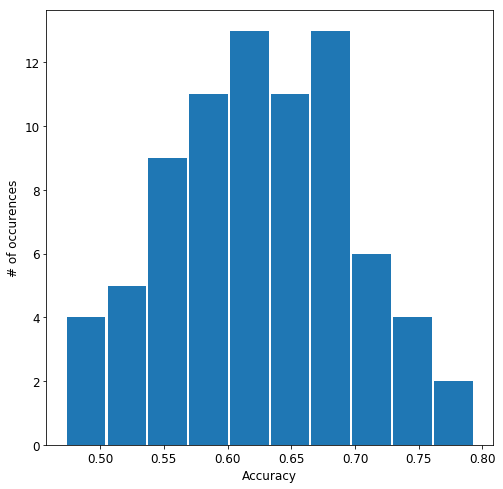

In [50]:
total = total_score + temp
plt.hist(total,rwidth=0.95);
plt.xlabel("Accuracy")
plt.ylabel("# of occurences")
plt.show()

In [106]:
from sklearn import metrics
import pandas as pd

filename="/Volumes/flashDrive/data/Ex10_Suj1_Run1-epo.fif"
epoch1 = mne.read_epochs(filename)
epoch1 = epoch1.pick_channels(epoch1.ch_names[0:60])

epochs_binary = epoch1[(epoch1.events[:,-1] == 4) | (epoch1.events[:,-1] == 5)]

clf = make_pipeline(Xdawn(n_components = 3),
                    Vectorizer(),
                    MinMaxScaler(),
                    LDA())
#cross validator
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)


#Do cross-validation

#X_train = epochs_binary[train]
#y_train = labels_binary[train]

#X_test = epochs_binary[test] 
#y_test =  preds_binary
labels_binary = epochs_binary.events[:,-1]
preds_binary = np.empty(len(labels_binary))
X_test = np.empty(len(labels_binary))
for train, test in cv.split(epochs_binary, labels_binary):
    clf.fit(epochs_binary[train], labels_binary[train])
    X_test[test] = labels_binary[test]
    preds_binary[test] = clf.predict(epochs_binary[test])

    
#print labels_binary
print type(X_test)
print type(preds_binary)


# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve
roc_curve(X_test,preds_binary)



Reading /Volumes/flashDrive/data/Ex10_Suj1_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


ValueError: Data is not binary and pos_label is not specified